In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


In [30]:
df = pd.read_csv("BTC-USD.csv")
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
3254,2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,1.264020e+10
3255,2023-08-16,29169.074219,29221.976563,28701.779297,28701.779297,28701.779297,1.494927e+10
3256,2023-08-17,28699.802734,28745.947266,25409.111328,26664.550781,26664.550781,3.112085e+10
3257,2023-08-18,26636.078125,26808.195313,25668.921875,26049.556641,26049.556641,2.402624e+10


In [31]:
df["pct_change"] = df["Close"].pct_change().fillna(0)
df

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,0.000000
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,-0.071926
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,-0.069843
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,0.035735
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,-0.024659
...,...,...,...,...,...,...,...,...
3254,2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,1.264020e+10,-0.008096
3255,2023-08-16,29169.074219,29221.976563,28701.779297,28701.779297,28701.779297,1.494927e+10,-0.016063
3256,2023-08-17,28699.802734,28745.947266,25409.111328,26664.550781,26664.550781,3.112085e+10,-0.070979
3257,2023-08-18,26636.078125,26808.195313,25668.921875,26049.556641,26049.556641,2.402624e+10,-0.023064


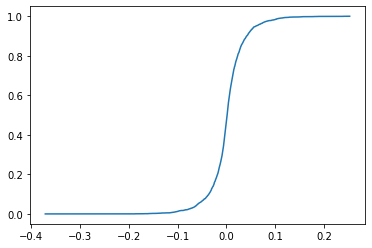

In [33]:
hist, bin_edges = np.histogram(df["pct_change"], bins=1000, density=True)
empirical_distribution = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])
plt.plot(bin_edges[1:], empirical_distribution)

In [34]:
def assign_class(pct_change, bin_edges, empirical_distribution, n_states):
    idx = np.digitize(pct_change, bin_edges)
    idx = min(idx, len(empirical_distribution) - 1)
    return int(np.floor(empirical_distribution[idx] * n_states)) + 1 

In [35]:
df["state_2"] = df["pct_change"].apply(lambda x: assign_class(x, bin_edges, empirical_distribution, 2))
df["state_3"] = df["pct_change"].apply(lambda x: assign_class(x, bin_edges, empirical_distribution, 3))
df["state_4"] = df["pct_change"].apply(lambda x: assign_class(x, bin_edges, empirical_distribution, 4))

In [36]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,state_2,state_3,state_4
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,0.000000,1,2,2
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,-0.071926,1,1,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,-0.069843,1,1,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,0.035735,2,3,4
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,-0.024659,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3254,2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,1.264020e+10,-0.008096,1,1,2
3255,2023-08-16,29169.074219,29221.976563,28701.779297,28701.779297,28701.779297,1.494927e+10,-0.016063,1,1,1
3256,2023-08-17,28699.802734,28745.947266,25409.111328,26664.550781,26664.550781,3.112085e+10,-0.070979,1,1,1
3257,2023-08-18,26636.078125,26808.195313,25668.921875,26049.556641,26049.556641,2.402624e+10,-0.023064,1,1,1


In [40]:
def transition_count_matrix(data, n_states):
    matrix = np.zeros((n_states, n_states), dtype=int)
    for i in range(len(data) - 1):
        from_state = min(data[i] - 1, n_states - 1)
        to_state = min(data[i + 1] - 1, n_states - 1)
        matrix[from_state][to_state] += 1
    return matrix

In [44]:
matrix2 = transition_count_matrix(df["state_2"].values, 2)
matrix3 = transition_count_matrix(df["state_3"].values, 3)

In [47]:
def compute_chi2_for_transition_counts(data_series, n_states):
    matrix = transition_count_matrix(data_series, n_states)
    chi2_val, p_value, _, _ = chi2_contingency(matrix)
    return matrix, chi2_val, p_value

In [48]:
results2 = compute_chi2_for_transition_counts(df["state_2"].values, 2)
results3 = compute_chi2_for_transition_counts(df["state_3"].values, 3)
results4 = compute_chi2_for_transition_counts(df["state_4"].values, 4)

In [49]:
results2

(array([[694, 857],
        [856, 851]]),
 9.289547685579466,
 0.002304650589456043)

In [50]:
results3

(array([[342, 298, 409],
        [301, 482, 306],
        [406, 309, 405]]),
 90.36854850854388,
 1.099545349422833e-18)

In [51]:
results4

(array([[206, 141, 202, 238],
        [166, 181, 252, 165],
        [184, 253, 254, 183],
        [231, 188, 167, 247]]),
 84.20135178268069,
 2.3550730960094508e-14)